# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%pip install matplotlib-venn
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

### Temperature data
*We start by importing and cleaning temperature data from Goddard Institute of Space Studies*  
Link to data: https://data.giss.nasa.gov/gistemp/

In [157]:
#Loading dataset on global temperature
GlobalTemp = 'GlobalTemp.csv'
pd.read_csv(GlobalTemp).head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.17,-.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17,-.16,***,***,-.11,-.16,-.19
1881,-.19,-.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07,-.08,-.09,-.16,.05,-.07,-.18
1882,.17,.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35,-.11,-.08,.08,-.09,-.15,-.18
1883,-.29,-.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10,-.17,-.19,-.33,-.15,-.09,-.18


In [158]:
#Skipping the first row to make months headers
GlobalTemp = pd.read_csv(GlobalTemp, skiprows=1)
GlobalTemp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17,-.16,***,***,-.11,-.16,-.19
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07,-.08,-.09,-.16,.05,-.07,-.18
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35,-.11,-.08,.08,-.09,-.15,-.18
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10,-.17,-.19,-.33,-.15,-.09,-.18
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30,-.28,-.26,-.10,-.36,-.30,-.28


In [159]:
#Removing unused data
drop_these = ['J-D','D-N','DJF','MAM','JJA','SON']

GlobalTemp.drop(drop_these, axis=1, inplace=True)
GlobalTemp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30


In [160]:
# #Set Year as index column
# GlobalTemp.set_index('Year', inplace=True)
# GlobalTemp.head()

In [161]:
#Removing the year 2024, since there are a limited number of observations for temperature
GlobalTemp = GlobalTemp[GlobalTemp['Year'] != 2024]

In [162]:
#Calculate annual average temperature
GlobalTemp = GlobalTemp.apply(pd.to_numeric, errors='coerce') #Convert all non-numeric values to NaN
GlobalTemp['Mean'] = GlobalTemp.iloc[:, 1:].mean(axis=1)                  #Calculates the mean value
GlobalTemp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean
0,1880,-0.17,-0.24,-0.08,-0.16,-0.09,-0.20,-0.17,-0.10,-0.13,-0.23,-0.21,-0.17,-0.162500
1,1881,-0.19,-0.13,0.04,0.06,0.06,-0.18,0.01,-0.03,-0.15,-0.21,-0.18,-0.07,-0.080833
2,1882,0.17,0.14,0.04,-0.16,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.107500
3,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.08,-0.06,-0.13,-0.21,-0.10,-0.22,-0.10,-0.168333
4,1884,-0.12,-0.07,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.33,-0.30,-0.275000


### GDP Data
*We load data for Global GDP*  
Link to data: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD?locations=1W 

In [163]:
#Load dataset
GDP = 'GDP.xls'
#%pip install xlrd
pd.read_excel(GDP, sheet_name=0).head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2023.0
3,Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.981501e+09,2.962907e+09,3.013858e+09,3.226291e+09,3.303132e+09,3.227067e+09,2.453133e+09,3.131163e+09,3.458630e+09,NaN
4,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.547764e+11,1.551709e+11,1.675316e+11,1.761564e+11,1.842232e+11,1.940722e+11,...,9.056601e+11,9.325135e+11,9.532061e+11,9.777220e+11,1.002081e+12,1.022529e+12,9.939082e+11,1.036651e+12,1.072261e+12,NaN


In [164]:
#Delete first 3 rows
GDP = pd.read_excel(GDP, skiprows=3)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.981501e+09,2.962907e+09,3.013858e+09,3.226291e+09,3.303132e+09,3.227067e+09,2.453133e+09,3.131163e+09,3.458630e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.547764e+11,1.551709e+11,1.675316e+11,1.761564e+11,1.842232e+11,1.940722e+11,...,9.056601e+11,9.325135e+11,9.532061e+11,9.777220e+11,1.002081e+12,1.022529e+12,9.939082e+11,1.036651e+12,1.072261e+12,NaN
2,Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.886050e+10,1.913422e+10,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.058912e+11,1.078584e+11,1.119278e+11,1.200731e+11,1.265726e+11,1.317427e+11,...,7.482119e+11,7.692632e+11,7.703563e+11,7.879687e+11,8.103378e+11,8.362760e+11,8.284304e+11,8.613714e+11,8.938137e+11,NaN
4,Angola,AGO,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.965050e+10,9.049642e+10,8.816151e+10,8.803178e+10,8.687297e+10,8.626288e+10,8.139919e+10,8.237534e+10,8.488400e+10,NaN


In [165]:
#Remove space in column names
GDP = GDP.rename(columns=lambda x: x.replace(' ', '_'))
GDP.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.981501e+09,2.962907e+09,3.013858e+09,3.226291e+09,3.303132e+09,3.227067e+09,2.453133e+09,3.131163e+09,3.458630e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.547764e+11,1.551709e+11,1.675316e+11,1.761564e+11,1.842232e+11,1.940722e+11,...,9.056601e+11,9.325135e+11,9.532061e+11,9.777220e+11,1.002081e+12,1.022529e+12,9.939082e+11,1.036651e+12,1.072261e+12,NaN
2,Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.886050e+10,1.913422e+10,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.058912e+11,1.078584e+11,1.119278e+11,1.200731e+11,1.265726e+11,1.317427e+11,...,7.482119e+11,7.692632e+11,7.703563e+11,7.879687e+11,8.103378e+11,8.362760e+11,8.284304e+11,8.613714e+11,8.938137e+11,NaN
4,Angola,AGO,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.965050e+10,9.049642e+10,8.816151e+10,8.803178e+10,8.687297e+10,8.626288e+10,8.139919e+10,8.237534e+10,8.488400e+10,NaN


In [166]:
#Select only World
GDP = GDP.loc[GDP.Country_Name == 'World']

In [167]:
#Keep only years
drop_these = ['Country_Name','Country_Code', 'Indicator_Name', 'Indicator_Code']
GDP.drop(drop_these, axis=1, inplace=True)
GDP

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
259,1.091827e+13,1.133020e+13,1.193924e+13,1.255948e+13,1.338394e+13,1.413042e+13,1.494156e+13,1.555776e+13,1.647904e+13,1.743295e+13,...,7.304120e+13,7.528327e+13,7.738123e+13,8.000914e+13,8.263047e+13,8.477125e+13,8.217910e+13,8.729771e+13,8.999466e+13,NaN


In [168]:
#Transpose the table
GDP = GDP.transpose()
GDP['Year'] = GDP.index
GDP

,259,Year
1960,1.091827e+13,1960
1961,1.133020e+13,1961
1962,1.193924e+13,1962
1963,1.255948e+13,1963
1964,1.338394e+13,1964
...,...,...
2019,8.477125e+13,2019
2020,8.217910e+13,2020
2021,8.729771e+13,2021
2022,8.999466e+13,2022


In [169]:
#Rename the columns
GDP.rename(columns = {259:'GDP'}, inplace=True)
GDP.reset_index(inplace = True, drop = True)
GDP

,GDP,Year
0,1.091827e+13,1960
1,1.133020e+13,1961
2,1.193924e+13,1962
3,1.255948e+13,1963
4,1.338394e+13,1964
...,...,...
59,8.477125e+13,2019
60,8.217910e+13,2020
61,8.729771e+13,2021
62,8.999466e+13,2022


In [170]:
#Removing the year 2023, since there is no data
GDP.loc[GDP.GDP >= 0]

,GDP,Year
0,1.091827e+13,1960
1,1.133020e+13,1961
2,1.193924e+13,1962
3,1.255948e+13,1963
4,1.338394e+13,1964
...,...,...
58,8.263047e+13,2018
59,8.477125e+13,2019
60,8.217910e+13,2020
61,8.729771e+13,2021


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

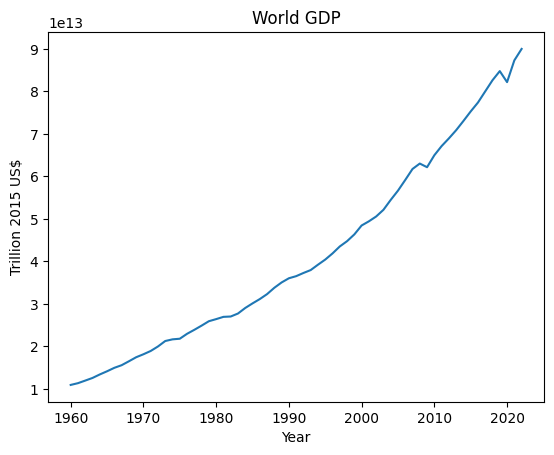

In [178]:
# Plot the content of the data frame GDP
GDP.plot(x='Year',y='GDP',legend=False)
plt.ylabel('Trillion 2015 US$')
plt.title('World GDP')
plt.show()

**Interactive plot** :

In [ ]:
#Calculating monthly averages


def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 



def plot_e(df, municipality): 
    I = df['municipality'] == municipality
    ax=df.loc[I,:].plot(x='year', y='empl', style='-o', legend=False)

widgets.interact(plot_e, 
    df = widgets.fixed(empl_long),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique(), 
                                    value='Roskilde')
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

In [ ]:

GDP['Year'] = GDP['Year'].astype(int)
GlobalTemp['Year'] = GlobalTemp['Year'].astype(int)
MERGED = pd.merge(GlobalTemp,GDP,on='Year', how='inner')
MERGED.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean,GDP
0,1960,0.00,0.13,-0.35,-0.15,-0.08,-0.04,-0.04,0.02,0.07,0.06,-0.11,0.19,-0.025000,1.091827e+13
1,1961,0.07,0.19,0.09,0.13,0.12,0.11,0.01,0.01,0.08,0.00,0.03,-0.16,0.056667,1.133020e+13
2,1962,0.05,0.15,0.10,0.05,-0.06,0.03,0.02,-0.01,0.00,0.01,0.06,-0.03,0.030833,1.193924e+13
3,1963,-0.03,0.18,-0.14,-0.07,-0.06,0.05,0.06,0.23,0.18,0.14,0.15,-0.03,0.055000,1.255948e+13
4,1964,-0.09,-0.10,-0.21,-0.32,-0.25,-0.04,-0.04,-0.22,-0.29,-0.31,-0.21,-0.30,-0.198333,1.338394e+13


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.